<a href="https://colab.research.google.com/github/likeaAI/ai_study/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D 
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd
import tensorflow as tf



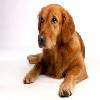

In [6]:
img = image.load_img('C:/Users/crid2/ml-data/test_dog.png' , target_size = (100,100))
img

# 이미지를 학습하기 위해서는 넘파이 배열로 변환해야 한다. 

In [7]:
print('rows - width , cols - height , channels - rgb')
img = image.img_to_array(img)
img = np.expand_dims(img , axis = 0) 
image_ = np.vstack([img]) 
image_.shape
# rgb code가 있어서 채널이 3개다.

rows - width , cols - height , channels - rgb


(1, 100, 100, 3)

In [8]:
print('CNN - Convolution Neural Network 합성곱 신경망 - ')
print('CNN 핵심 - 합성곱레이어와 풀링레이어')
print('padding  - valid , same')
print('filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이')
print('kernel_size - 연산을 수행할 때 원도우의 크기')
print('strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정')
model = Sequential() 

model.add( Conv2D(input_shape = (10, 10, 3) , 
                  filters = 10 , 
                  kernel_size = (3,3) , 
                  strides = (1,1) , 
                  padding = 'same') )

CNN - Convolution Neural Network 합성곱 신경망 - 
CNN 핵심 - 합성곱레이어와 풀링레이어
padding  - valid , same
filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이
kernel_size - 연산을 수행할 때 원도우의 크기
strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정


- CNN - Convolution Neural Network 합성공 신경망 - 
- CNN 핵심 - 합성곱레이어와 플링레이어 
- padding - valid, smae 
- kernel_size - 연산을 수행할때 윈도우 크기 
- strides - 가로 세로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정 

In [9]:
model.output_shape

(None, 10, 10, 10)

In [10]:
print('풀링 - pooling ')
print('원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - ')
print()

# model.add( MaxPooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
# print(model.output_shape)

model.add( AveragePooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
print(model.output_shape)


풀링 - pooling 
원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - 

(None, 9, 9, 10)


In [11]:
datasets = load_digits()
datasets.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
datasets.images[0].shape # 왜 채널이 없을까 흑백이라서 1차원으로 본다. 컬러풀은 3차원...  

(8, 8)

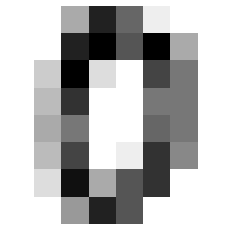

In [13]:
plt.figure()

plt.imshow(datasets.images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [14]:
datasets.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
X_data = datasets.images
y_data = datasets.target 

In [16]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [17]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1] ,  X_data.shape[2], 1 )
X_data.shape # 채널 1이 있어야 학습이 가능해서 위의 모양대로 reshape을 하였다. 

(1797, 8, 8, 1)

In [18]:
y_data = to_categorical(y_data)
y_data.shape

(1797, 10)

In [19]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_data , 
                                                       test_size    = 0.2 ,
                                                       random_state = 111)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [22]:
print('cnn 입력층 - ')
mnist_cnn_model = Sequential()
mnist_cnn_model.add( Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]) , 
                            filters = 10 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'valid' , activation = 'relu') ) 

print('shape - ' , mnist_cnn_model.output_shape)

cnn 입력층 - 
shape -  (None, 6, 6, 10)


In [23]:
print('cnn 풀링레이어 만들기 - ')

mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
print(mnist_cnn_model.output_shape)


cnn 풀링레이어 만들기 - 
(None, 3, 3, 10)


In [24]:
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.output_shape

(None, 90)

In [25]:
mnist_cnn_model.add( Dense(50 , activation = 'relu'))
mnist_cnn_model.add( Dense(10 , activation = 'softmax'))

In [26]:
mnist_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 10)          100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [27]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [ ]:
with tf.device("/device:GPU:0"):
    mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=100  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/100


In [ ]:
plt.figure(figsize=(20,10))

plt.plot(mnist_cnn_model_history.history['accuracy']    , 's-', label='acc')
plt.plot(mnist_cnn_model_history.history['val_accuracy'], 'd-', label='val_acc')

plt.legend(loc='best')
plt.xticks(np.arange(100))
plt.title('accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [ ]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test , y_test)
mnist_cnn_model_eval

mnist 이용한 CNN

In [ ]:
(X_train,y_train),(X_test, y_test)= mnist.load_data()

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2], 1 )
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2], 1 )

In [ ]:
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

In [ ]:
# 데이터 전처리 - 

X_train, X_test = X_train/255 , X_test/255

In [ ]:

mnist_cnn_model = Sequential()
#1 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 32 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#3 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))




In [ ]:
# CNN 입력층 생성 
mnist_cnn_model.output_shape

feature extraction - 

In [28]:
print('Dense 층 추가 - ')
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.add( Dense(units = 512) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 256) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 128) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 64) )
mnist_cnn_model.add( Activation('relu') )

mnist_cnn_model.add( Dense(units = 10) )
mnist_cnn_model.add( Activation('softmax') )


# mnist_cnn_model.output_shape

(None, 1024)


In [29]:
mnist_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

In [1]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

NameError: name 'mnist_cnn_model' is not defined

In [2]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=12  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

NameError: name 'mnist_cnn_model' is not defined

In [3]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test, y_test)
mnist_cnn_model_eval

NameError: name 'mnist_cnn_model' is not defined

In [4]:
y_pred = mnist_cnn_model.predict(X_test[0])

NameError: name 'mnist_cnn_model' is not defined

In [5]:
print('모델 저장')
mnist_cnn_model.save('model-case.h12')

NameError: name 'mnist_cnn_model' is not defined

In [ ]:
print('모델 복원')
loaded_model = load_model('model-case.h12')
loaded_model.summary()

In [ ]:
loss , acc = loaded_model.evaluate(X_test , y_test)
print('loss - ' , loss)
print('acc  - ' , acc)

In [6]:
import os 
print('데이터 세트 경로 - ')
train_horse_dir = 'C:/Users/crid2/ml-data/horse-or-human/horses'
train_human_dir = 'C:/Users/crid2/ml-data/horse-or-human/humans'

데이터 세트 경로 - 


In [7]:
train_horse_fileName = os.listdir(train_horse_dir)
train_human_fileName = os.listdir(train_human_dir)

In [8]:
train_horse_fileName[0:10]

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png']

In [9]:
train_human_fileName[0:10]

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png']

In [10]:
print('총이미지 갯수 - ')
print('말 갯수- ' , len(train_horse_fileName))
print('사람 수  - ' , len(train_human_fileName))

총이미지 갯수 - 
말 갯수-  500
사람 수  -  527


In [16]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/horse-or-human' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [19]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (300, 300, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 1) )
  img_model.add( Activation('sigmoid') ) # 이진분류 sigmoid 사용

  return img_model 

In [21]:
model = img_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 activation_12 (Activation)  (None, 298, 298, 16)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 149, 149, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 activation_13 (Activation)  (None, 147, 147, 32)      0         
                                                      

In [25]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'binary_crossentropy' , 
                      metrics=['accuracy'] ) 

In [ ]:
model_history = model.fit(train_generator , epochs = 15 , verbose = 1 , steps_per_epoch = 8 )

Epoch 1/15


In [60]:
# !wget --no-check-certificate \
# https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
# -O /tmp/cats_and_dogs_filtered.zip


'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
from google.colab import files

upload_img = files.upload()
print(upload_img)
print(upload_img.keys())

for fn in upload_img.keys() :
  print('file name - ' , fn )
  path = '/content/'+fn
  img = image.load_img(path , target_size = (300, 300))
  x   = image.img_to_array(img) 
  x   = np.expand_dims(x , axis = 0 ) 
  image_ = np.vstack([x])

  classes = model.predict(image_ , batch_size = 10 ) 
  print('pred - ' , classes[0])
print('예측하기 - ')


고양이 개 이미지 분류 실습하기 

In [ ]:
import os
import zipfile

path = '/tmp/cats_and_dogs_filtered.zip' 
zip  = zipfile.ZipFile(path , 'r')

zip.extractall('/tmp')
zip.close()